# 2. Selección, Limpieza y Alistamineto de Datos

## Librerias

In [1]:
%pip install gdown

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import gdown
import os

## Base de Datos Inicial

In [3]:
file_id = "1rGmaBuo0xymafMghsgGMRYPPFTtwVzp3"
url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, 'Saber11.csv', quiet=False)
df = pd.read_csv('Saber11.csv')
os.remove("Saber11.csv")
df.head()

Downloading...
From (original): https://drive.google.com/uc?id=1rGmaBuo0xymafMghsgGMRYPPFTtwVzp3
From (redirected): https://drive.google.com/uc?id=1rGmaBuo0xymafMghsgGMRYPPFTtwVzp3&confirm=t&uuid=2699603f-fd47-4652-b1b5-4c4f8669ee16
To: c:\Users\felip\OneDrive\Desktop\Maestria Industrial\2025-1\Analitica\Proyecto 2\Proyecto-2\Saber11.csv
100%|██████████| 297M/297M [00:07<00:00, 37.5MB/s] 


,periodo,tipodocumento,documento,zona,bilingue,calendario,caracter,daneestablecimiento,danesede,codigodpto,...,computador,internet,lavadora,nivelingles,ingles,mate,sociales,ciencias,lectura,global
0,20132,CC,SB11201320520337,URBANO,N,A,TÉCNICO/ACADÉMICO,1.110010e+11,111001015776,11,...,Si,Si,Si,NaN,40.0,44.0,NaN,NaN,NaN,NaN
1,20132,TI,SB11201320545839,URBANO,N,A,ACADÉMICO,1.080010e+11,108001002835,8,...,No,No,Si,A1,43.0,28.0,NaN,NaN,NaN,NaN
2,20132,TI,SB11201320008819,URBANO,N,A,TÉCNICO/ACADÉMICO,1.730010e+11,173001000359,73,...,Si,Si,Si,A-,43.0,43.0,NaN,NaN,NaN,NaN
3,20132,TI,SB11201320512865,RURAL,N,A,ACADÉMICO,2.707020e+11,270702000120,70,...,No,No,No,A-,39.0,34.0,NaN,NaN,NaN,NaN
4,20132,TI,SB11201320037607,URBANO,N,A,ACADÉMICO,1.118500e+11,111850001576,11,...,Si,Si,No,NaN,43.0,34.0,NaN,NaN,NaN,NaN


## Datos Inexistentes, Incohernete, Innecesarios, Nuevas Columnas y Cambios

### Cantidad de datos vacios (NaN)

In [4]:
nan_dicc = {}
for i in df.columns:
    if df[i].isna().sum() >0:
        nan_dicc[i]=df[i].isna().sum()
nan_df =pd.DataFrame(list(nan_dicc.items()),columns=["Variable","NaN"])
nan_df.T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Variable,tipodocumento,zona,bilingue,caracter,daneestablecimiento,sedeprincipal,coddeptoreside,codmcpioreside,dptoreside,sexo,...,personashogar,automovil,computador,internet,lavadora,nivelingles,sociales,ciencias,lectura,global
NaN,1,80,59591,1817,141,92688,542,542,542,135,...,442,451,449,449,474,92932,583775,583775,583775,583775


### Columnas Inexistentes

In [5]:
df.drop(["global","lectura","ciencias","sociales"],axis=1, inplace=True)
df.head()

,periodo,tipodocumento,documento,zona,bilingue,calendario,caracter,daneestablecimiento,danesede,codigodpto,...,edupadre,estrato,personashogar,automovil,computador,internet,lavadora,nivelingles,ingles,mate
0,20132,CC,SB11201320520337,URBANO,N,A,TÉCNICO/ACADÉMICO,1.110010e+11,111001015776,11,...,Secundaria (Bachillerato) completa,Estrato 3,Cinco,No,Si,Si,Si,NaN,40.0,44.0
1,20132,TI,SB11201320545839,URBANO,N,A,ACADÉMICO,1.080010e+11,108001002835,8,...,No sabe,Estrato 1,Cuatro,No,No,No,Si,A1,43.0,28.0
2,20132,TI,SB11201320008819,URBANO,N,A,TÉCNICO/ACADÉMICO,1.730010e+11,173001000359,73,...,Secundaria (Bachillerato) completa,Estrato 2,Cuatro,No,Si,Si,Si,A-,43.0,43.0
3,20132,TI,SB11201320512865,RURAL,N,A,ACADÉMICO,2.707020e+11,270702000120,70,...,Primaria incompleta,Estrato 1,Cinco,No,No,No,No,A-,39.0,34.0
4,20132,TI,SB11201320037607,URBANO,N,A,ACADÉMICO,1.118500e+11,111850001576,11,...,Secundaria (Bachillerato) incompleta,Estrato 2,Seis,No,Si,Si,No,NaN,43.0,34.0


### Completar Nivel de Inglés y datos coherentes

In [6]:
df.groupby('nivelingles')['ingles'].describe()

,count,mean,std,min,25%,50%,75%,max
nivelingles,,,,,,,,
A-,275297.0,38.100005,4.710958,0.0,35.0,39.0,42.0,43.0
A1,156946.0,46.262001,2.663476,43.0,45.0,46.0,48.0,52.0
A2,29637.0,56.245706,2.458735,53.0,54.0,56.0,58.0,61.0
B+,9614.0,89.612232,5.558709,83.0,83.0,89.0,94.0,100.0
B1,19349.0,71.309887,5.733368,63.0,66.0,71.0,77.0,80.0


In [7]:
def AsginarNivelIngles(puntaje):
    if puntaje <43:
        return "A-"
    elif puntaje < 53:
        return "A1"
    elif puntaje < 63:
        return "A2"
    elif puntaje < 83:
        return "B1"
    else:
        return "B+"
    
df['nivelingles'] = df['nivelingles'].fillna(df['ingles'].apply(AsginarNivelIngles))
df = df[(df["ingles"]<= 100) & (df["ingles"]>=0)]

### Crear Nivel de Matemáticas y Corregir Incohernecias

In [8]:
df["mate"].describe()

count    583458.000000
mean         45.081062
std          10.711995
min           0.000000
25%          38.000000
50%          44.000000
75%          51.000000
max         127.000000
Name: mate, dtype: float64

In [9]:
def AsignarNivelMate(puntaje): 
    if pd.isna(puntaje) or puntaje > 100 or puntaje < 0:
        return None
    return min(int(puntaje // (100/6)) + 1, 6)
   
df = df[df["mate"]<= 100]
df["Nivelmate"] = df["mate"].apply(AsignarNivelMate) # Crear la nueva columna con los niveles
df.head()

,periodo,tipodocumento,documento,zona,bilingue,calendario,caracter,daneestablecimiento,danesede,codigodpto,...,estrato,personashogar,automovil,computador,internet,lavadora,nivelingles,ingles,mate,Nivelmate
0,20132,CC,SB11201320520337,URBANO,N,A,TÉCNICO/ACADÉMICO,1.110010e+11,111001015776,11,...,Estrato 3,Cinco,No,Si,Si,Si,A-,40.0,44.0,3
1,20132,TI,SB11201320545839,URBANO,N,A,ACADÉMICO,1.080010e+11,108001002835,8,...,Estrato 1,Cuatro,No,No,No,Si,A1,43.0,28.0,2
2,20132,TI,SB11201320008819,URBANO,N,A,TÉCNICO/ACADÉMICO,1.730010e+11,173001000359,73,...,Estrato 2,Cuatro,No,Si,Si,Si,A-,43.0,43.0,3
3,20132,TI,SB11201320512865,RURAL,N,A,ACADÉMICO,2.707020e+11,270702000120,70,...,Estrato 1,Cinco,No,No,No,No,A-,39.0,34.0,3
4,20132,TI,SB11201320037607,URBANO,N,A,ACADÉMICO,1.118500e+11,111850001576,11,...,Estrato 2,Seis,No,Si,Si,No,A1,43.0,34.0,3


### Seleccionar Nacionalidad

In [10]:
df = df[df["nacionalidad"]== "COLOMBIA"]

### Seleccionar Edades Coherentes

In [11]:
df["Edad"] = 2019-(df["fechanac"].str.split("/").str[2]).astype(int)
df = df[(df['Edad'] > 14) & (df['Edad'] < 25)]
df

,periodo,tipodocumento,documento,zona,bilingue,calendario,caracter,daneestablecimiento,danesede,codigodpto,...,personashogar,automovil,computador,internet,lavadora,nivelingles,ingles,mate,Nivelmate,Edad
1,20132,TI,SB11201320545839,URBANO,N,A,ACADÉMICO,1.080010e+11,108001002835,8,...,Cuatro,No,No,No,Si,A1,43.0,28.0,2,23
2,20132,TI,SB11201320008819,URBANO,N,A,TÉCNICO/ACADÉMICO,1.730010e+11,173001000359,73,...,Cuatro,No,Si,Si,Si,A-,43.0,43.0,3,23
3,20132,TI,SB11201320512865,RURAL,N,A,ACADÉMICO,2.707020e+11,270702000120,70,...,Cinco,No,No,No,No,A-,39.0,34.0,3,24
4,20132,TI,SB11201320037607,URBANO,N,A,ACADÉMICO,1.118500e+11,111850001576,11,...,Seis,No,Si,Si,No,A1,43.0,34.0,3,23
6,20132,TI,SB11201320047502,URBANO,N,A,ACADÉMICO,3.110010e+11,311001036527,11,...,Cuatro,Si,Si,Si,Si,B1,68.0,46.0,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583768,20132,TI,SB11201320449654,URBANO,N,A,ACADÉMICO,1.130520e+11,113052000172,13,...,Seis,No,No,No,Si,A-,40.0,54.0,4,22
583769,20132,CC,SB11201320529417,RURAL,N,A,TÉCNICO,2.130060e+11,213006001975,13,...,Seis,No,No,No,Si,A-,42.0,41.0,3,24
583770,20132,TI,SB11201320391259,URBANO,N,A,TÉCNICO/ACADÉMICO,1.136570e+11,113657000107,13,...,Seis,No,No,No,Si,A-,43.0,38.0,3,23
583773,20132,TI,SB11201320454077,URBANO,N,A,ACADÉMICO,1.761090e+11,176109000800,76,...,Seis,No,No,No,No,B1,71.0,44.0,3,24


### Descartar Precidiarios

In [12]:
df.groupby("libertad").describe()

periodo                                                     \
             count          mean       std      min      25%      50%   
libertad                                                                
N         468916.0  20131.950727  0.216438  20131.0  20132.0  20132.0   
S             61.0  20132.000000  0.000000  20132.0  20132.0  20132.0   

                           daneestablecimiento                ... Nivelmate  \
              75%      max               count          mean  ...       75%   
libertad                                                      ...             
N         20132.0  20132.0            468859.0  2.088297e+11  ...       4.0   
S         20132.0  20132.0                61.0  2.628207e+11  ...       3.0   

                   Edad                                                     
          max     count       mean       std   min   25%   50%   75%   max  
libertad                                                                    
N         6.0  468916.0  22.945225  0.772721  16.0  22.0  23.0  23.0  24.0  
S         5.0      61.0  23.540984  0.696988  21.0  23.0  24.0  24.0  24.0  

[2 rows x 112 columns]

In [13]:
df = df[df["libertad"]=="N"]

### Columnas Innecesarias

In [14]:
df.drop(["documento","daneestablecimiento","danesede","codigodpto","codigomcpio","codigoicfes","nombreest",
         "nombresede","sedeprincipal","coddptopres","codmcpiopres","coddeptoreside","codmcpioreside","dptopres",
         "investigacion","tipoestudiante","libertad","mcpiopres","mcpioreside","mcpio", "bilingue","paisreside","nacionalidad"],
        axis=1, inplace=True)
df.head()

C:\Users\felip\AppData\Local\Temp\ipykernel_32688\626980104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["documento","daneestablecimiento","danesede","codigodpto","codigomcpio","codigoicfes","nombreest",


,periodo,tipodocumento,zona,calendario,caracter,dpto,genero,jornada,naturaleza,dptoreside,...,personashogar,automovil,computador,internet,lavadora,nivelingles,ingles,mate,Nivelmate,Edad
1,20132,TI,URBANO,A,ACADÉMICO,ATLANTICO,MIXTO,MAÑANA,OFICIAL,ATLANTICO,...,Cuatro,No,No,No,Si,A1,43.0,28.0,2,23
2,20132,TI,URBANO,A,TÉCNICO/ACADÉMICO,TOLIMA,MIXTO,COMPLETA,OFICIAL,TOLIMA,...,Cuatro,No,Si,Si,Si,A-,43.0,43.0,3,23
3,20132,TI,RURAL,A,ACADÉMICO,SUCRE,MIXTO,TARDE,OFICIAL,SUCRE,...,Cinco,No,No,No,No,A-,39.0,34.0,3,24
4,20132,TI,URBANO,A,ACADÉMICO,BOGOTA,MIXTO,TARDE,OFICIAL,BOGOTÁ,...,Seis,No,Si,Si,No,A1,43.0,34.0,3,23
6,20132,TI,URBANO,A,ACADÉMICO,BOGOTA,MIXTO,COMPLETA,NO OFICIAL,BOGOTÁ,...,Cuatro,Si,Si,Si,Si,B1,68.0,46.0,3,22


## Nuevas Bases de Datos

### Base de Datos Matemáticas

In [15]:
df_Mate = df.copy()
df_Mate.drop(["zona","calendario","caracter","dpto","genero","jornada","naturaleza"],axis=1, inplace=True)
df_Mate = df_Mate.dropna()

#### Datos que no proporcionan información

In [16]:
df_Mate = df_Mate[df_Mate["edumadre"] != "No sabe"]
df_Mate = df_Mate[df_Mate["edupadre"] != "No sabe"]
df_Mate = df_Mate.dropna()
df_Mate

,periodo,tipodocumento,dptoreside,fechanac,sexo,cuartoshogar,edumadre,edupadre,estrato,personashogar,automovil,computador,internet,lavadora,nivelingles,ingles,mate,Nivelmate,Edad
2,20132,TI,TOLIMA,06/12/1996,M,Tres,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Estrato 2,Cuatro,No,Si,Si,Si,A-,43.0,43.0,3,23
3,20132,TI,SUCRE,27/08/1995,M,Uno,Primaria completa,Primaria incompleta,Estrato 1,Cinco,No,No,No,No,A-,39.0,34.0,3,24
4,20132,TI,BOGOTÁ,18/03/1996,M,Dos,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) incompleta,Estrato 2,Seis,No,Si,Si,No,A1,43.0,34.0,3,23
6,20132,TI,BOGOTÁ,29/04/1997,M,Tres,Educación profesional completa,Técnica o tecnológica completa,Estrato 3,Cuatro,Si,Si,Si,Si,B1,68.0,46.0,3,22
7,20132,TI,HUILA,26/12/1995,M,Cuatro,Primaria incompleta,Primaria incompleta,Estrato 2,Cuatro,No,No,No,No,A1,45.0,43.0,3,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583768,20132,TI,BOLIVAR,21/03/1997,M,Tres,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,Estrato 1,Seis,No,No,No,Si,A-,40.0,54.0,4,22
583769,20132,CC,BOLIVAR,12/03/1995,M,Dos,Primaria completa,Primaria completa,Estrato 1,Seis,No,No,No,Si,A-,42.0,41.0,3,24
583770,20132,TI,BOLIVAR,22/10/1996,F,Dos,Secundaria (Bachillerato) completa,Ninguno,Estrato 1,Seis,No,No,No,Si,A-,43.0,38.0,3,23
583773,20132,TI,VALLE,05/06/1995,M,Dos,Primaria incompleta,Primaria incompleta,Estrato 1,Seis,No,No,No,No,B1,71.0,44.0,3,24


#### Mapeo Educación

In [17]:
mapa_educacion = {
    'Ninguno': 'Ninguno',
    'Primaria incompleta': 'Primaria inc.',
    'Primaria completa': 'Primaria',
    'Secundaria (Bachillerato) incompleta': 'Secundaria inc.',
    'Secundaria (Bachillerato) completa': 'Secundaria',
    'Técnica o tecnológica incompleta': 'Técnica/tecn. inc.',
    'Técnica o tecnológica completa': 'Técnica/tecn.',
    'Educación profesional incompleta': 'Profesional inc.',
    'Educación profesional completa': 'Profesional',
    'Postgrado': 'Postgrado'
}

df_Mate['edupadre'] = df_Mate['edupadre'].map(mapa_educacion)
df_Mate['edumadre'] = df_Mate['edumadre'].map(mapa_educacion)

#### Guardar Base de Datos

In [18]:
df_Mate.to_csv("SaberMate.csv", index = False)

### Base de Datos Inglés

In [19]:
df_Ingles = df.copy()
df_Ingles.drop(["tipodocumento","dptoreside","fechanac","sexo","cuartoshogar","edumadre","edupadre","estrato","personashogar","automovil",
                "computador","internet","lavadora"],axis=1, inplace=True)
df_Ingles

,periodo,zona,calendario,caracter,dpto,genero,jornada,naturaleza,nivelingles,ingles,mate,Nivelmate,Edad
1,20132,URBANO,A,ACADÉMICO,ATLANTICO,MIXTO,MAÑANA,OFICIAL,A1,43.0,28.0,2,23
2,20132,URBANO,A,TÉCNICO/ACADÉMICO,TOLIMA,MIXTO,COMPLETA,OFICIAL,A-,43.0,43.0,3,23
3,20132,RURAL,A,ACADÉMICO,SUCRE,MIXTO,TARDE,OFICIAL,A-,39.0,34.0,3,24
4,20132,URBANO,A,ACADÉMICO,BOGOTA,MIXTO,TARDE,OFICIAL,A1,43.0,34.0,3,23
6,20132,URBANO,A,ACADÉMICO,BOGOTA,MIXTO,COMPLETA,NO OFICIAL,B1,68.0,46.0,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583768,20132,URBANO,A,ACADÉMICO,BOLIVAR,MIXTO,TARDE,OFICIAL,A-,40.0,54.0,4,22
583769,20132,RURAL,A,TÉCNICO,BOLIVAR,MIXTO,MAÑANA,OFICIAL,A-,42.0,41.0,3,24
583770,20132,URBANO,A,TÉCNICO/ACADÉMICO,BOLIVAR,MIXTO,MAÑANA,OFICIAL,A-,43.0,38.0,3,23
583773,20132,URBANO,A,ACADÉMICO,VALLE,MIXTO,MAÑANA,OFICIAL,B1,71.0,44.0,3,24


#### Datos que no proporcionan información

In [20]:
df_Ingles = df_Ingles[df_Ingles["calendario"] != "OTRO"]
df_Ingles = df_Ingles[df_Ingles["jornada"] != "UNICA"]
df_Ingles = df_Ingles.dropna()
df_Ingles

,periodo,zona,calendario,caracter,dpto,genero,jornada,naturaleza,nivelingles,ingles,mate,Nivelmate,Edad
1,20132,URBANO,A,ACADÉMICO,ATLANTICO,MIXTO,MAÑANA,OFICIAL,A1,43.0,28.0,2,23
2,20132,URBANO,A,TÉCNICO/ACADÉMICO,TOLIMA,MIXTO,COMPLETA,OFICIAL,A-,43.0,43.0,3,23
3,20132,RURAL,A,ACADÉMICO,SUCRE,MIXTO,TARDE,OFICIAL,A-,39.0,34.0,3,24
4,20132,URBANO,A,ACADÉMICO,BOGOTA,MIXTO,TARDE,OFICIAL,A1,43.0,34.0,3,23
6,20132,URBANO,A,ACADÉMICO,BOGOTA,MIXTO,COMPLETA,NO OFICIAL,B1,68.0,46.0,3,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583768,20132,URBANO,A,ACADÉMICO,BOLIVAR,MIXTO,TARDE,OFICIAL,A-,40.0,54.0,4,22
583769,20132,RURAL,A,TÉCNICO,BOLIVAR,MIXTO,MAÑANA,OFICIAL,A-,42.0,41.0,3,24
583770,20132,URBANO,A,TÉCNICO/ACADÉMICO,BOLIVAR,MIXTO,MAÑANA,OFICIAL,A-,43.0,38.0,3,23
583773,20132,URBANO,A,ACADÉMICO,VALLE,MIXTO,MAÑANA,OFICIAL,B1,71.0,44.0,3,24


#### Guardar Base de Datos

In [21]:
df_Ingles.to_csv("SaberIngles.csv", index = False)

# 3. Exploración de Datos

## Librerias

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

## Primera Base de Datos

### Analisis de Datos - General

In [23]:
df_Mate["mate"].describe()

count    445343.000000
mean         45.978576
std          10.758778
min           0.000000
25%          40.000000
50%          44.000000
75%          52.000000
max         100.000000
Name: mate, dtype: float64

In [24]:
df_Mate.groupby("Nivelmate").describe()

periodo                                                     \
              count          mean       std      min      25%      50%   
Nivelmate                                                                
1            1668.0  20131.947242  0.223617  20131.0  20132.0  20132.0   
2           40516.0  20131.969049  0.173186  20131.0  20132.0  20132.0   
3          276633.0  20131.968221  0.175410  20131.0  20132.0  20132.0   
4          107207.0  20131.926301  0.261281  20131.0  20132.0  20132.0   
5           17905.0  20131.831332  0.374469  20131.0  20132.0  20132.0   
6            1414.0  20131.550919  0.497576  20131.0  20131.0  20132.0   

                               ingles             ...  mate             Edad  \
               75%      max     count       mean  ...   75%    max     count   
Nivelmate                                         ...                          
1          20132.0  20132.0    1668.0  39.330935  ...  13.0   16.0    1668.0   
2          20132.0  20132.0   40516.0  40.844531  ...  33.0   33.0   40516.0   
3          20132.0  20132.0  276633.0  42.783854  ...  46.0   50.0  276633.0   
4          20132.0  20132.0  107207.0  51.066423  ...  60.0   66.0  107207.0   
5          20132.0  20132.0   17905.0  67.878861  ...  75.0   83.0   17905.0   
6          20132.0  20132.0    1414.0  81.630835  ...  95.0  100.0    1414.0   

                                                              
                mean       std   min   25%   50%   75%   max  
Nivelmate                                                     
1          23.079736  0.802065  20.0  23.0  23.0  24.0  24.0  
2          23.052177  0.776485  17.0  23.0  23.0  24.0  24.0  
3          22.974349  0.774304  16.0  22.0  23.0  24.0  24.0  
4          22.828183  0.755118  16.0  22.0  23.0  23.0  24.0  
5          22.811449  0.749048  17.0  22.0  23.0  23.0  24.0  
6          23.057992  0.807451  17.0  23.0  23.0  24.0  24.0  

[6 rows x 32 columns]

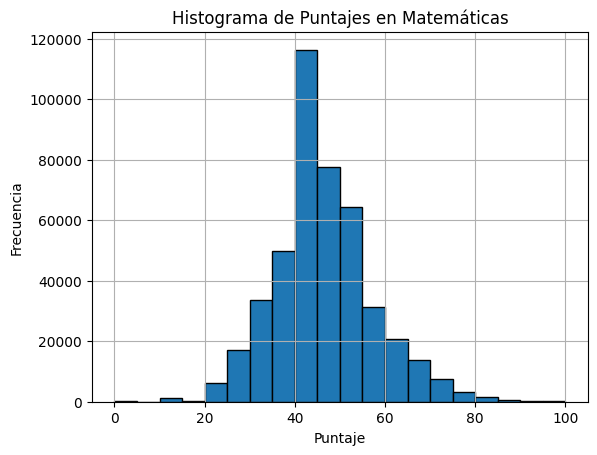

In [25]:
plt.hist(df_Mate['mate'], bins=20, edgecolor='black')
plt.title('Histograma de Puntajes en Matemáticas')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### Analisis de Datos - Autocorrelación

In [26]:
VCramerMate = {}
for i in df_Mate.columns:
    if i != "Nivelmate" and i != "ingles" and i != "mate":
        tabla = pd.crosstab(df_Mate['Nivelmate'], df_Mate[i])
        chi2, p, dof, expected = chi2_contingency(tabla)
        n = tabla.sum().sum()
        phi2 = chi2 / n
        r, k = tabla.shape
        v_cramer = np.sqrt(phi2 / min(k - 1, r - 1))
        VCramerMate[i] =v_cramer

VCramerMate = pd.DataFrame.from_dict(VCramerMate, orient='index', columns=['V de Cramer']).reset_index()
VCramerMate.rename(columns={'index': 'Variable'}, inplace=True)
VCramerMate['V de Cramer'] = VCramerMate['V de Cramer'].astype(float).round(3)
VCramerMate = VCramerMate.sort_values(by='V de Cramer', ascending=False).reset_index(drop=True)

VCramerMate.T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Variable,nivelingles,automovil,internet,computador,periodo,estrato,edupadre,edumadre,lavadora,sexo,fechanac,dptoreside,personashogar,Edad,cuartoshogar,tipodocumento
V de Cramer,0.295,0.228,0.22,0.207,0.177,0.167,0.158,0.155,0.146,0.141,0.088,0.075,0.049,0.046,0.035,0.028


### Graficos

#### Box plots

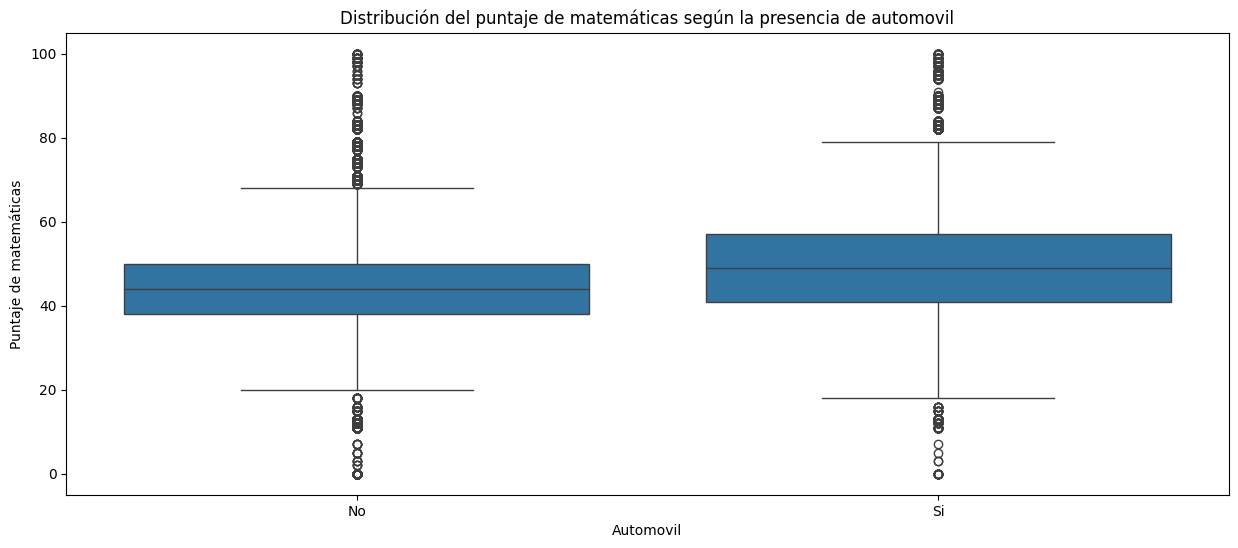

In [27]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='automovil', y='mate', data=df_Mate)
plt.xlabel('Automovil')
plt.ylabel('Puntaje de matemáticas')
plt.title('Distribución del puntaje de matemáticas según la presencia de automovil')
plt.show()

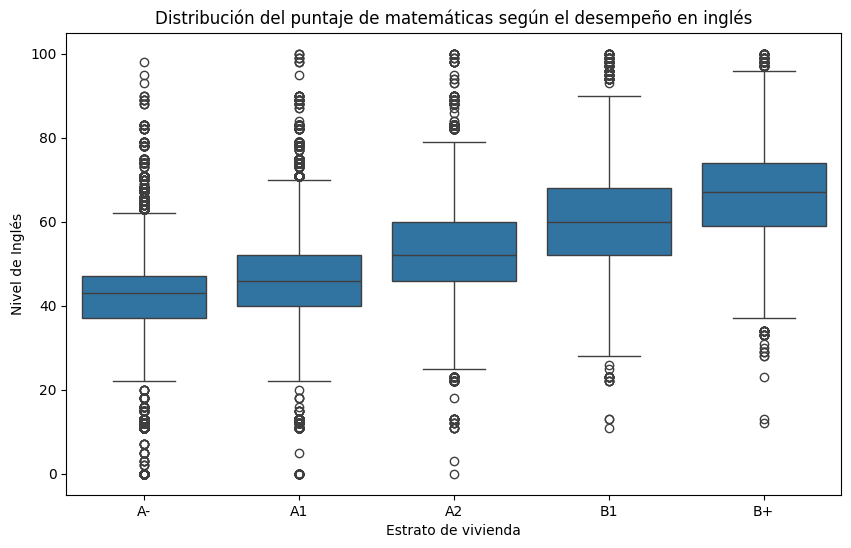

In [28]:
orde_ingles = ["A-", "A1", "A2", "B1", "B+"]
plt.figure(figsize=(10, 6))
sns.boxplot(x='nivelingles', y='mate', data=df_Mate,order= orde_ingles)
plt.xlabel('Estrato de vivienda')
plt.ylabel('Nivel de Inglés')
plt.title('Distribución del puntaje de matemáticas según el desempeño en inglés')
plt.show()

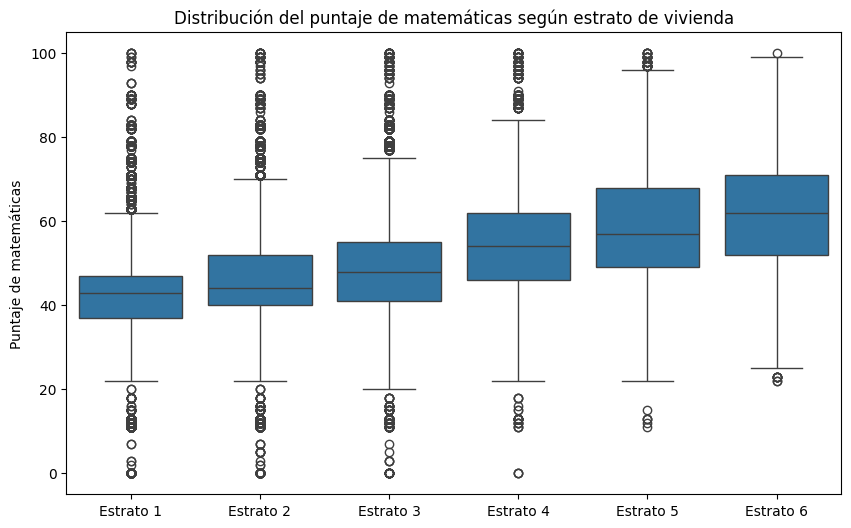

In [29]:
orden_estrato =["Estrato 1","Estrato 2","Estrato 3","Estrato 4", "Estrato 5", "Estrato 6"]
plt.figure(figsize=(10, 6))
sns.boxplot(x='estrato', y='mate', data=df_Mate, order = orden_estrato)
plt.xlabel('')
plt.ylabel('Puntaje de matemáticas')
plt.title('Distribución del puntaje de matemáticas según estrato de vivienda')
plt.show()

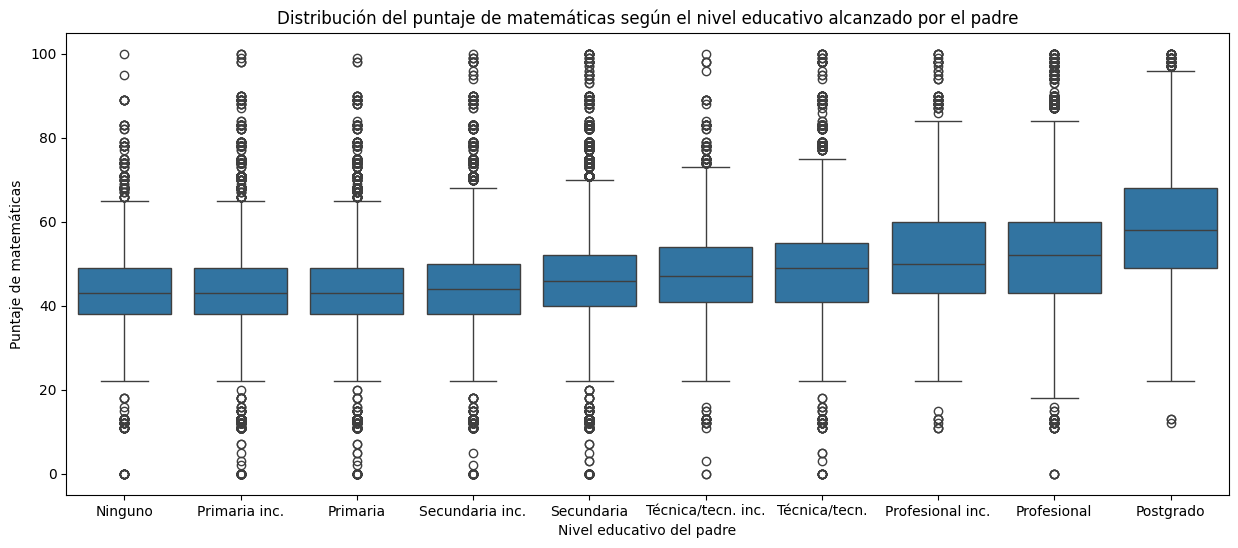

In [30]:
orden_educacion = ['Ninguno','Primaria inc.','Primaria','Secundaria inc.','Secundaria','Técnica/tecn. inc.','Técnica/tecn.','Profesional inc.','Profesional','Postgrado']
plt.figure(figsize=(15, 6))
sns.boxplot(x='edupadre', y='mate', data=df_Mate, order = orden_educacion)
plt.xlabel('Nivel educativo del padre')
plt.ylabel('Puntaje de matemáticas')
plt.title('Distribución del puntaje de matemáticas según el nivel educativo alcanzado por el padre')
plt.show()

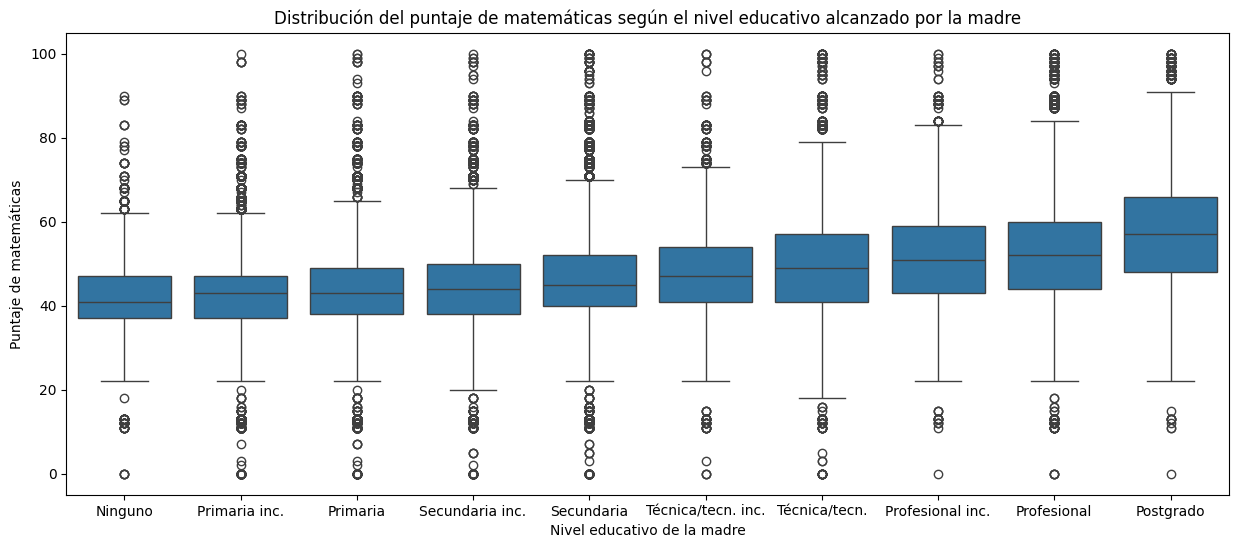

In [31]:
orden_educacion = ['Ninguno','Primaria inc.','Primaria','Secundaria inc.','Secundaria','Técnica/tecn. inc.','Técnica/tecn.','Profesional inc.','Profesional','Postgrado']
plt.figure(figsize=(15, 6))
sns.boxplot(x='edumadre', y='mate', data=df_Mate, order = orden_educacion)
plt.xlabel('Nivel educativo de la madre')
plt.ylabel('Puntaje de matemáticas')
plt.title('Distribución del puntaje de matemáticas según el nivel educativo alcanzado por la madre')
plt.show()

#### Histogramas

Text(0, 0.5, 'Frecuencia')

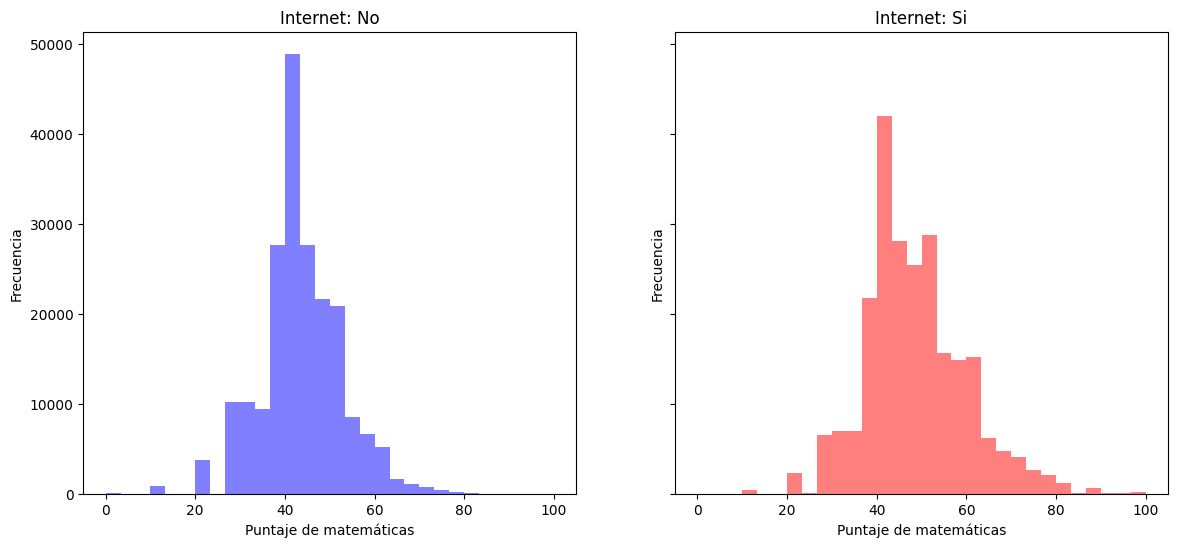

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
axes[0].hist(df_Mate[df_Mate["internet"]=="No"]["mate"], bins=30, color='blue', alpha=0.5)
axes[0].set_title('Internet: No')
axes[0].set_xlabel('Puntaje de matemáticas')
axes[0].set_ylabel('Frecuencia')

axes[1].hist(df_Mate[df_Mate["internet"]=="Si"]["mate"], bins=30, color='red', alpha=0.5)
axes[1].set_title('Internet: Si')
axes[1].set_xlabel('Puntaje de matemáticas')
axes[1].set_ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

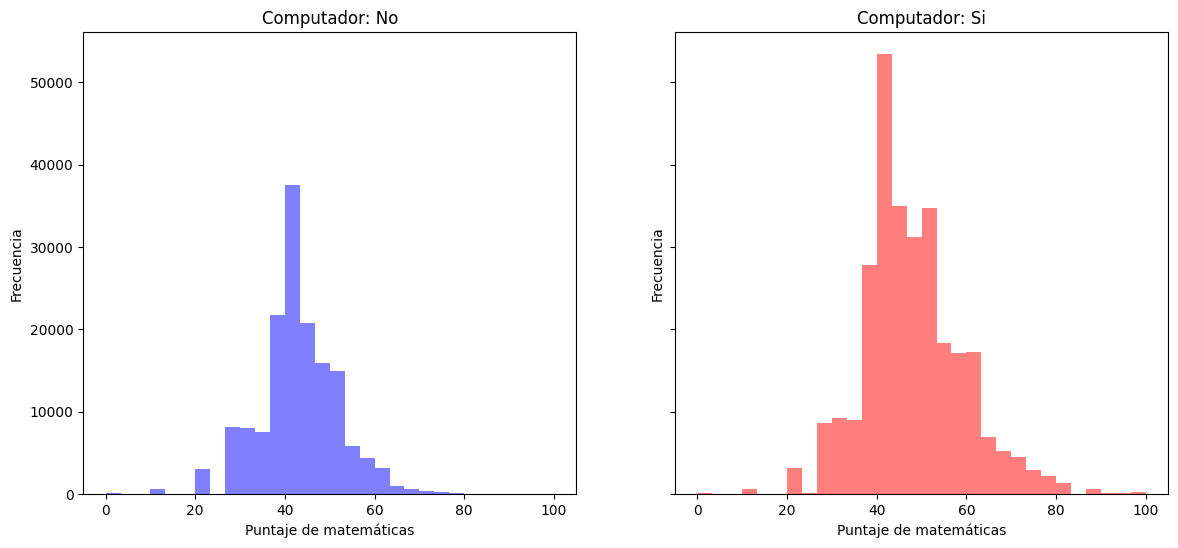

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
axes[0].hist(df_Mate[df_Mate["computador"]=="No"]["mate"], bins=30, color='blue', alpha=0.5)
axes[0].set_title('Computador: No')
axes[0].set_xlabel('Puntaje de matemáticas')
axes[0].set_ylabel('Frecuencia')

axes[1].hist(df_Mate[df_Mate["computador"]=="Si"]["mate"], bins=30, color='red', alpha=0.5)
axes[1].set_title('Computador: Si')
axes[1].set_xlabel('Puntaje de matemáticas')
axes[1].set_ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

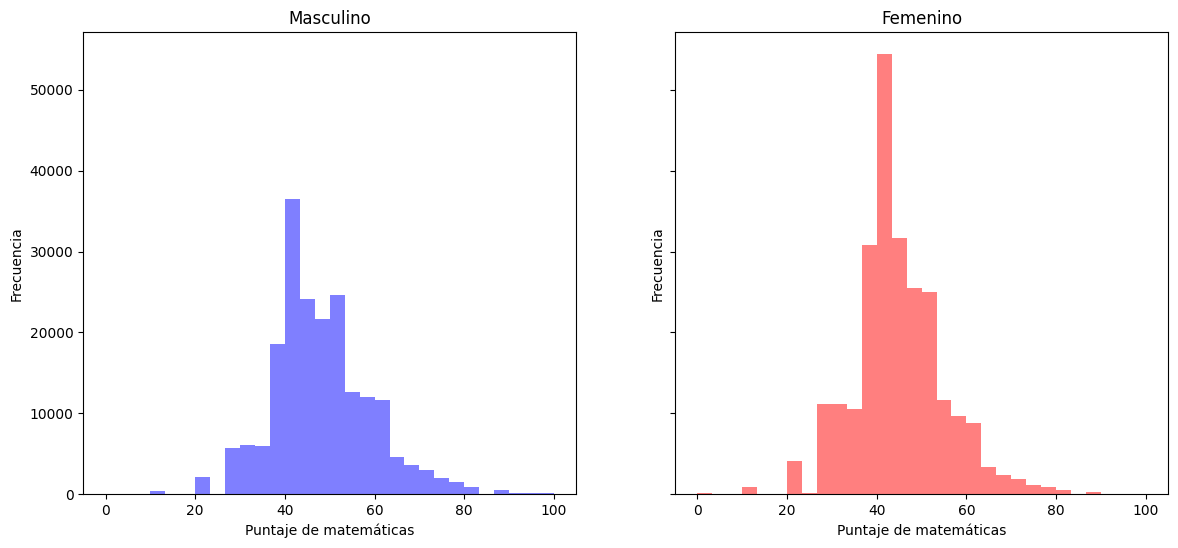

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
axes[0].hist(df_Mate[df_Mate["sexo"]=="M"]["mate"], bins=30, color='blue', alpha=0.5)
axes[0].set_title('Masculino')
axes[0].set_xlabel('Puntaje de matemáticas')
axes[0].set_ylabel('Frecuencia')

axes[1].hist(df_Mate[df_Mate["sexo"]=="F"]["mate"], bins=30, color='red', alpha=0.5)
axes[1].set_title('Femenino')
axes[1].set_xlabel('Puntaje de matemáticas')
axes[1].set_ylabel('Frecuencia')



## Segunda Base de Datos

### Analisis de Datos - General

In [35]:
df_Ingles.groupby("nivelingles").describe()

periodo                                                     \
                count          mean       std      min      25%      50%   
nivelingles                                                                
A-           223325.0  20131.969372  0.172308  20131.0  20132.0  20132.0   
A1           169067.0  20131.968687  0.174163  20131.0  20132.0  20132.0   
A2            37915.0  20131.928603  0.257489  20131.0  20132.0  20132.0   
B+            10825.0  20131.678060  0.467242  20131.0  20131.0  20132.0   
B1            25086.0  20131.841545  0.365174  20131.0  20132.0  20132.0   

                                 ingles             ... Nivelmate       \
                 75%      max     count       mean  ...       75%  max   
nivelingles                                         ...                  
A-           20132.0  20132.0  223325.0  38.473324  ...       3.0  6.0   
A1           20132.0  20132.0  169067.0  46.320749  ...       4.0  6.0   
A2           20132.0  20132.0   37915.0  56.279203  ...       4.0  6.0   
B+           20132.0  20132.0   10825.0  89.436212  ...       5.0  6.0   
B1           20132.0  20132.0   25086.0  71.102766  ...       5.0  6.0   

                 Edad                                                     
                count       mean       std   min   25%   50%   75%   max  
nivelingles                                                               
A-           223325.0  23.023204  0.779413  16.0  22.0  23.0  24.0  24.0  
A1           169067.0  22.891913  0.760585  16.0  22.0  23.0  23.0  24.0  
A2            37915.0  22.745035  0.727392  17.0  22.0  23.0  23.0  24.0  
B+            10825.0  23.077413  0.773446  17.0  23.0  23.0  24.0  24.0  
B1            25086.0  22.817747  0.747882  17.0  22.0  23.0  23.0  24.0  

[5 rows x 40 columns]

In [36]:
df_Ingles["ingles"].describe()

count    466218.000000
mean         45.706133
std          11.302650
min           0.000000
25%          40.000000
50%          43.000000
75%          48.000000
max         100.000000
Name: ingles, dtype: float64

In [ ]:
plt.hist(df_Ingles['ingles'], bins=20, edgecolor='black')
plt.title('Histograma de Puntajes en Matemáticas')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### Analisis de Datos - Autocorrelación

In [37]:
VCramerIngles = {}
for i in df_Ingles.columns:
    if i != "nivelingles" and i != "ingles" and i != "mate":
        tabla = pd.crosstab(df_Ingles['nivelingles'], df_Ingles[i])
        chi2, p, dof, expected = chi2_contingency(tabla)
        n = tabla.sum().sum()
        phi2 = chi2 / n
        r, k = tabla.shape
        v_cramer = np.sqrt(phi2 / min(k - 1, r - 1))
        VCramerIngles[i] =v_cramer

VCramerIngles = pd.DataFrame.from_dict(VCramerIngles, orient='index', columns=['V de Cramer']).reset_index()
VCramerIngles.rename(columns={'index': 'Variable'}, inplace=True)
VCramerIngles['V de Cramer'] = VCramerIngles['V de Cramer'].astype(float).round(3)
VCramerIngles = VCramerIngles.sort_values(by='V de Cramer', ascending=False).reset_index(drop=True)

VCramerIngles.T

,0,1,2,3,4,5,6,7,8,9
Variable,naturaleza,Nivelmate,calendario,periodo,jornada,genero,dpto,zona,caracter,Edad
V de Cramer,0.352,0.294,0.292,0.243,0.165,0.137,0.118,0.101,0.093,0.065


### Graficos

#### Box-Plots

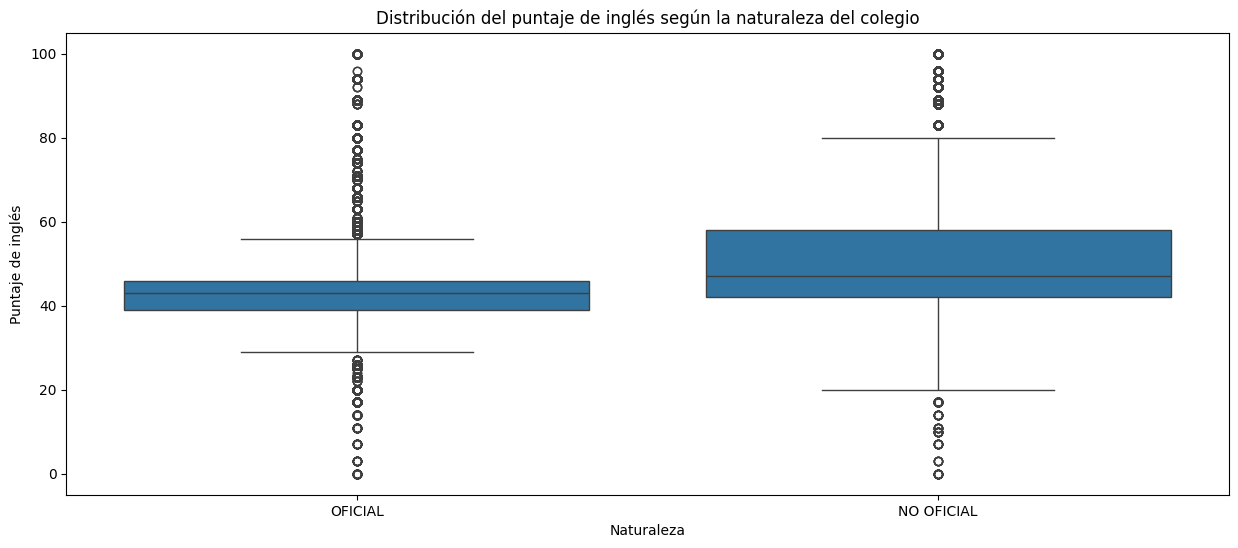

In [38]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='naturaleza', y='ingles', data=df_Ingles)
plt.xlabel('Naturaleza')
plt.ylabel('Puntaje de inglés')
plt.title('Distribución del puntaje de inglés según la naturaleza del colegio')
plt.show()

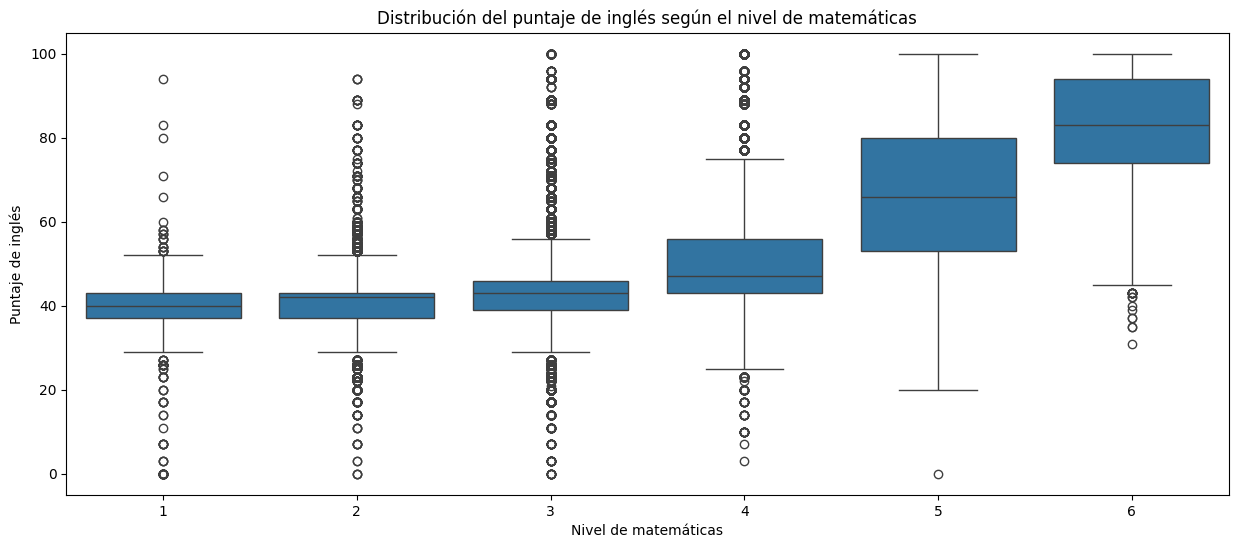

In [39]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Nivelmate', y='ingles', data=df_Ingles)
plt.xlabel('Nivel de matemáticas')
plt.ylabel('Puntaje de inglés')
plt.title('Distribución del puntaje de inglés según el nivel de matemáticas')
plt.show()

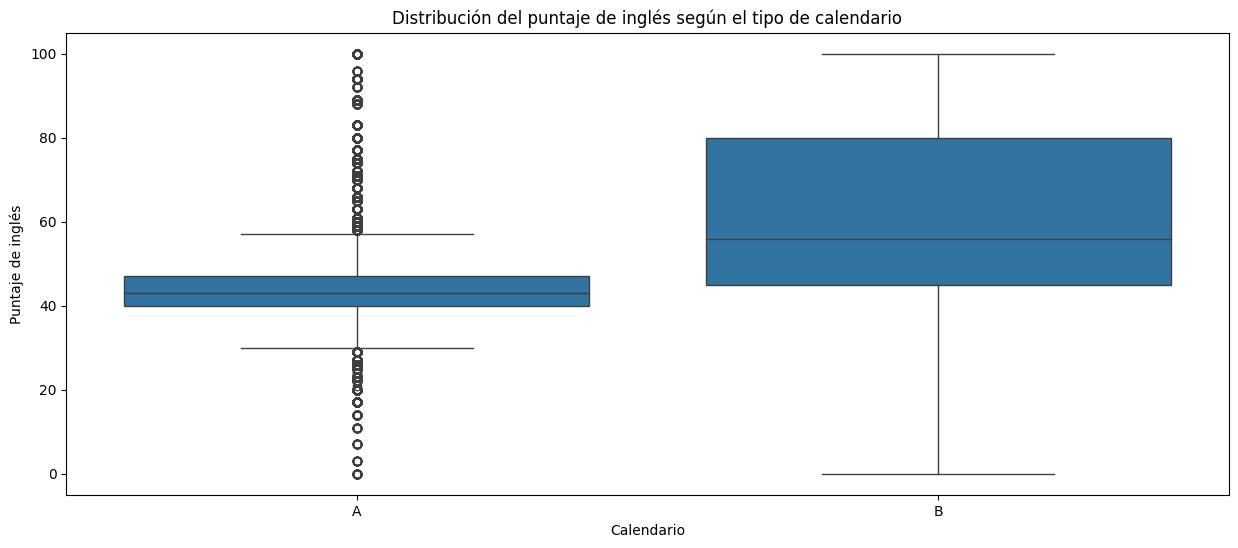

In [40]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='calendario', y='ingles', data=df_Ingles)
plt.xlabel('Calendario')
plt.ylabel('Puntaje de inglés')
plt.title('Distribución del puntaje de inglés según el tipo de calendario')
plt.show()

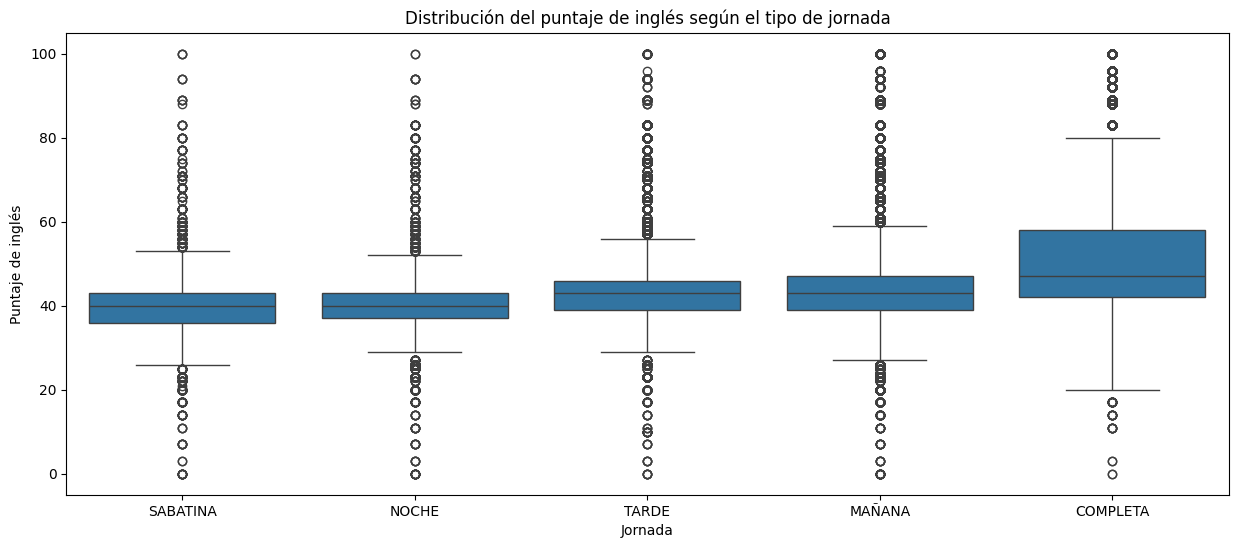

In [41]:
orden_jornada = ["SABATINA","NOCHE","TARDE","MAÑANA","COMPLETA"]
plt.figure(figsize=(15, 6))
sns.boxplot(x='jornada', y='ingles', data=df_Ingles, order = orden_jornada)
plt.xlabel('Jornada')
plt.ylabel('Puntaje de inglés')
plt.title('Distribución del puntaje de inglés según el tipo de jornada')
plt.show()

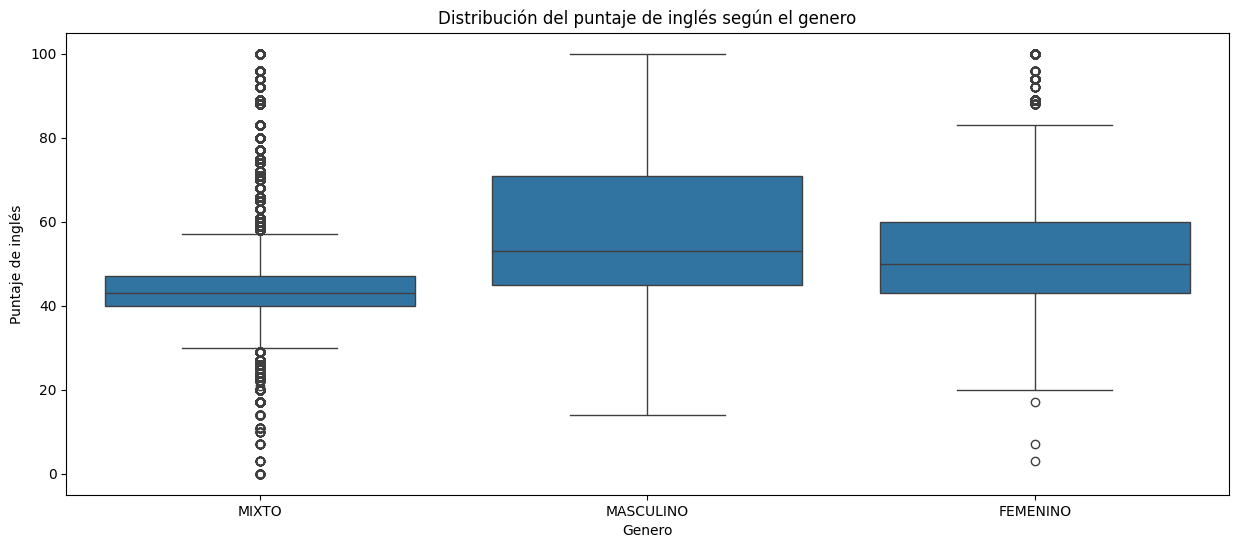

In [42]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='genero', y='ingles', data=df_Ingles)
plt.xlabel('Genero')
plt.ylabel('Puntaje de inglés')
plt.title('Distribución del puntaje de inglés según el genero')
plt.show()

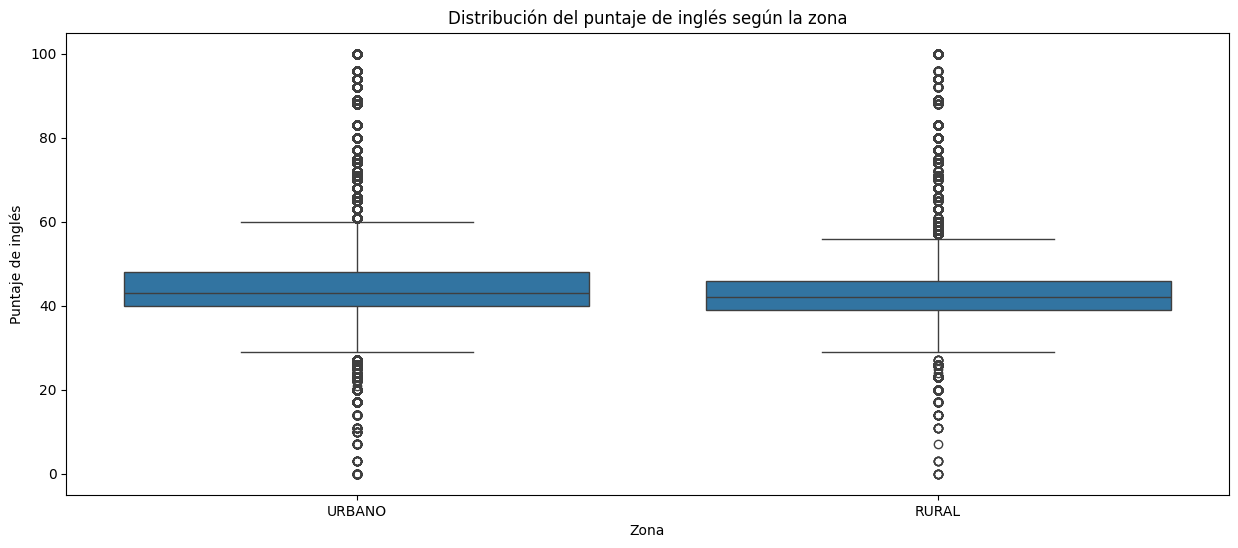

In [43]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='zona', y='ingles', data=df_Ingles)
plt.xlabel('Zona')
plt.ylabel('Puntaje de inglés')
plt.title('Distribución del puntaje de inglés según la zona')
plt.show()

# 4. Modelo de clasificación

In [44]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder


### Modelo Matemáticas

In [46]:
variables_seleccionadas = ["nivelingles", "automovil", "internet", "computador", "periodo", 
                            "estrato", "lavadora", "sexo", "edupadre", "edumadre"]
variables_nominales = ["nivelingles", "automovil", "internet", "computador", "periodo", 
                       "estrato", "lavadora", "sexo", "edupadre", "edumadre"]

In [47]:
X = df_Mate[variables_seleccionadas]
y = tf.keras.utils.to_categorical(df_Mate["Nivelmate"]-1, num_classes=6) # Variable objetivo

### Prepocesamiento

In [48]:
# One-Hot Encoding (categóricas)
one_hot_encoder = OneHotEncoder(sparse_output=False, drop="first")  #drop="first" para evitar colinealidad entre categorías.
X_nominal_encoded = one_hot_encoder.fit_transform(df_Mate[variables_nominales])
print(X_nominal_encoded[:1,])
# Obtener los nombres de las columnas generadas
column_names = one_hot_encoder.get_feature_names_out(variables_nominales)
print(column_names)

[[0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0.]]
['nivelingles_A1' 'nivelingles_A2' 'nivelingles_B+' 'nivelingles_B1'
 'automovil_Si' 'internet_Si' 'computador_Si' 'periodo_20132'
 'estrato_Estrato 2' 'estrato_Estrato 3' 'estrato_Estrato 4'
 'estrato_Estrato 5' 'estrato_Estrato 6' 'lavadora_Si' 'sexo_M'
 'edupadre_Postgrado' 'edupadre_Primaria' 'edupadre_Primaria inc.'
 'edupadre_Profesional' 'edupadre_Profesional inc.' 'edupadre_Secundaria'
 'edupadre_Secundaria inc.' 'edupadre_Técnica/tecn.'
 'edupadre_Técnica/tecn. inc.' 'edumadre_Postgrado' 'edumadre_Primaria'
 'edumadre_Primaria inc.' 'edumadre_Profesional'
 'edumadre_Profesional inc.' 'edumadre_Secundaria'
 'edumadre_Secundaria inc.' 'edumadre_Técnica/tecn.'
 'edumadre_Técnica/tecn. inc.']


In [49]:
X_transformed = X_nominal_encoded #np.hstack([X_ordinal_encoded, X_nominal_encoded])

In [50]:
#print("Shape de X_transformed:", X_transformed.shape)
#print("Shape de y:", y.shape)

In [51]:
# División de datos en entrenamiento, validación y pruebas
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

### Red neuronal

In [52]:
tf.keras.backend.clear_session() #clears any previous Keras session to avoid conflicts

In [53]:
model_mate = keras.Sequential([
    keras.layers.Dense(3, activation="relu", input_shape=(X_train.shape[1],)),
    #keras.layers.Dropout(0.5), #apaga el 50% de las neuronas
    keras.layers.Dense(6, activation="softmax")  # 10 clases de Nivelmate
])

c:\Users\felip\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model_mate.compile(loss="categorical_crossentropy", optimizer="adam",  metrics=[CategoricalAccuracy(), Precision(), Recall()])
#metrics=["accuracy"] #No es bueno con datos desbalanceados

In [55]:
#import numpy as np

# Reconviertes one-hot a etiquetas
#y_labels = np.argmax(y_train, axis=1)

# Ahora cuentas cuántas muestras hay por clase
#classes, counts = np.unique(y_labels, return_counts=True)

#for cls, count in zip(classes, counts):
#    print(f"Clase {cls}: {count} muestras")


### Entrenamiento

In [56]:
history = model_mate.fit(X_train, y_train, epochs=5,batch_size=32, validation_data=(X_valid, y_valid))


Epoch 1/5
8907/8907 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - categorical_accuracy: 0.6323 - loss: 1.0092 - precision: 0.6598 - recall: 0.5285 - val_categorical_accuracy: 0.6595 - val_loss: 0.8815 - val_precision: 0.6751 - val_recall: 0.6239
Epoch 2/5
8907/8907 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - categorical_accuracy: 0.6603 - loss: 0.8784 - precision: 0.6743 - recall: 0.6286 - val_categorical_accuracy: 0.6606 - val_loss: 0.8796 - val_precision: 0.6755 - val_recall: 0.6246
Epoch 3/5
8907/8907 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - categorical_accuracy: 0.6606 - loss: 0.8777 - precision: 0.6747 - recall: 0.6288 - val_categorical_accuracy: 0.6598 - val_loss: 0.8792 - val_precision: 0.6744 - val_recall: 0.6272
Epoch 4/5
8907/8907 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - categorical_accuracy: 0.6598 - loss: 0.8794 - precision: 0.6730 - recall: 0.6294 - val_categorical_accuracy: 0.6602 - val_loss: 0.8788 - val_precision: 0.6712 - val_recall: 0.6356
Epoch 5/5
8907/8907 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - 

### Evaluar modelo

In [57]:
results = model_mate.evaluate(X_test, y_test)
loss_mate, accuracy_mate, precision_mate, recall_mate = results

print(f"Loss: {loss_mate:.4f}")
print(f"Accuracy: {accuracy_mate:.4f}")
print(f"Precision: {precision_mate:.4f}")
print(f"Recall: {recall_mate:.4f}")


2784/2784 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.6575 - loss: 0.8799 - precision: 0.6715 - recall: 0.6250
Loss: 0.8783
Accuracy: 0.6593
Precision: 0.6739
Recall: 0.6264


In [58]:
#loss_mate, accuracy_mate = model_mate.evaluate(X_test, y_test)
#print(f"Precisión en conjunto de prueba del modelo de Nivelmate: {accuracy_mate:.4f}")

In [59]:
#plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label='val_loss')
#plt.xlabel('Epoch')
#plt.ylabel('Pérdida')
#plt.title('Evolución de la Pérdida')
#plt.legend()

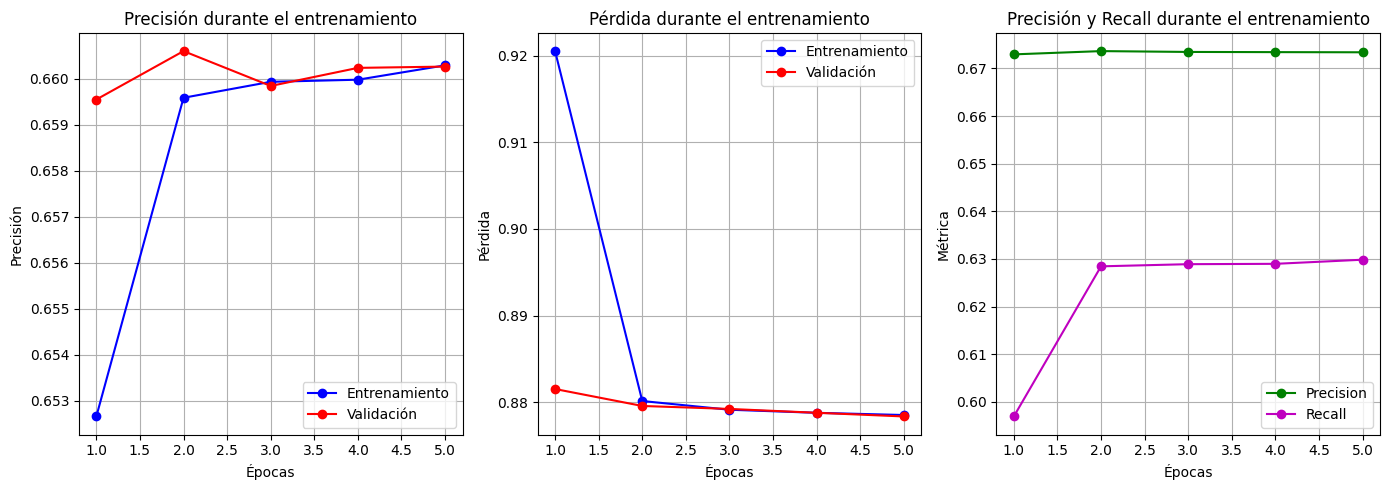

In [60]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Extraer datos del history
    acc = history.history.get('accuracy') or history.history.get('categorical_accuracy')
    val_acc = history.history.get('val_accuracy') or history.history.get('val_categorical_accuracy')
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Configurar la figura
    plt.figure(figsize=(14, 5))

    # Subplot 1: Precisión
    plt.subplot(1, 3, 1)
    plt.plot(epochs, acc, 'bo-', label='Entrenamiento')
    plt.plot(epochs, val_acc, 'ro-', label='Validación')
    plt.title('Precisión durante el entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)

    # Subplot 2: Pérdida
    plt.subplot(1, 3, 2)
    plt.plot(epochs, loss, 'bo-', label='Entrenamiento')
    plt.plot(epochs, val_loss, 'ro-', label='Validación')
    plt.title('Pérdida durante el entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)

    # Subplot 3: Precisión y Recall por época
    plt.subplot(1, 3, 3)
    plt.plot(epochs, history.history['precision'], 'go-', label='Precision')
    plt.plot(epochs, history.history['recall'], 'mo-', label='Recall')
    plt.title('Precisión y Recall durante el entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Métrica')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Llama la función después de entrenar tu modelo
plot_training_history(history)


### Predicciones

In [61]:
predicciones = model_mate.predict(X_test)  #Devuelve la probabilidad de cada clase (n_muestras, 6)

# Convertir los datos de prueba y las predicciones a etiquetas de clase
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(predicciones, axis=1)

2784/2784 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


#### Matriz Confusión

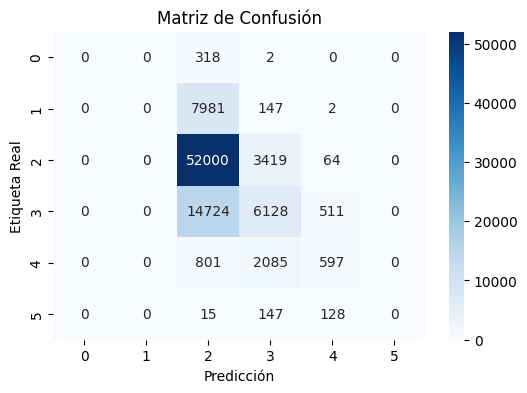

In [62]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)



# Visualizar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
plt.show()

## Guardar la imagen localmente antes de registrarla en MLflow
plt.savefig("confusion_matrix.png")
plt.close()


#### Matriz Confusión (Porcentajes)

In [63]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)

# Convertir a porcentajes respecto al total
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum() * 100

plt.figure(figsize=(6, 4))

# Visualizar la matriz de confusión como porcentajes SIN barra de color
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión (%)")
plt.tight_layout()
#plt.show()

# Guardar la imagen
plt.savefig("confusion_matrix.png")
plt.close()

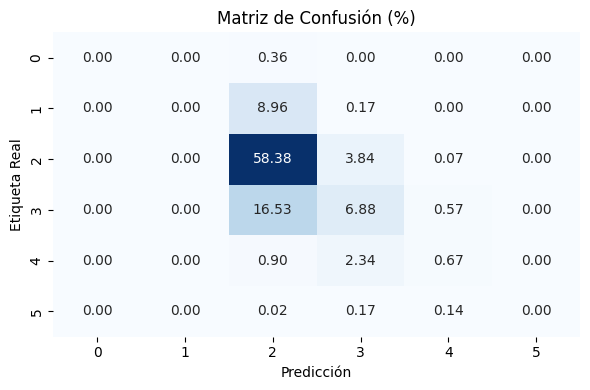

In [64]:
plt.figure(figsize=(6, 4))

# Visualizar la matriz de confusión como porcentajes SIN barra de color
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión (%)")
plt.tight_layout()
plt.show()
plt.close()

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calcular las métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="macro") #Usamos macro porque tenemos clases desbalanceadas
recall = recall_score(y_true, y_pred, average="macro")
f1 = f1_score(y_true, y_pred, average="macro")

# Mostrar resultados
print(f"Accuracy: {accuracy:.4f}") #Indica buen desempeño, pero si las clases están desbalanceadas, puede ser engañoso
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}") #cuántos ejemplos de cada clase fueron correctamente identificados.
print(f"F1-score: {f1:.4f}") #Es la media armónica de precisión y recall, indicando qué tan equilibrado es el modelo.

Accuracy: 0.6593
Precision: 0.2763
Recall: 0.2326
F1-score: 0.2349


c:\Users\felip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Guardado del Modelo

In [66]:
model_mate.save("model_mate.keras")

In [67]:
from tensorflow.keras.models import load_model

model_cargado = load_model("model_mate.keras")

### Guardado de las métricas

In [68]:
import json

metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1": f1
}

with open("metrics_mate.json", "w") as f:
    json.dump(metrics, f)